Based on the 'activation maximization' technique suggested in [this](https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf) paper. 

We will view the layers of the (pretrained) GoogLeNet just like in [this](https://distill.pub/2017/feature-visualization/) post.

## Import useful libraries 

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision import models

## Import a pretrained GoogLeNet

In [4]:
model = models.googlenet(pretrained = True)

model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [5]:
# We now freeze the parameters of our pretrained model
for param in model.parameters():
    param.requires_grad_(False)

In [6]:
# layer: inception4a
model.inception4a

Inception(
  (branch1): BasicConv2d(
    (conv): Conv2d(480, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (branch2): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(480, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicConv2d(
      (conv): Conv2d(96, 208, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(208, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (branch3): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(480, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicConv2d(
      (conv): Conv2d(16, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): Batc

In [7]:
# We will register a forward hook to get the output of the layers

activation = {} # to store the activation  of a layer
def create_hook(name):
    def hook(m, i, o):
        # copy the output of the given layer
        activation[name] = o
       
    return hook


# register a forward hook for layer 3a i.e. the first inception layer
model.inception4a.register_forward_hook(create_hook('4a'))

## Create an input image 

The starting image will consist of random values for the pixels

In [8]:
# normalize the input image to have appropriate mean and standard deviation as specified by pytorch
from torchvision import transforms



normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [9]:
# generating the initial image with random pixel values between 0 and 1
H = 224 # height of input image
W = 224 # width of input image
img = np.single(np.random.uniform(0,1, (3, H, W))) # we need the pixel values to be of type float32 
print("img_shape:{}, img_dtype: {}".format(img.shape, img.dtype ))
# convert the image to a torch tensor with the requisite mean and std. dev. 
img_tensor = normalize(torch.from_numpy(img))
print(img_tensor)

img_shape:(3, 224, 224), img_dtype: float32
tensor([[[ 0.9421,  0.3918, -1.1631,  ...,  1.4636,  0.6645, -1.2956],
         [ 1.1919, -0.2743,  1.5817,  ..., -1.4746,  0.1406, -0.2102],
         [-0.8875, -0.4553, -0.8075,  ..., -1.8606,  1.3299, -0.3238],
         ...,
         [-0.3767,  0.3761, -0.9148,  ...,  0.0354,  1.5576, -2.0466],
         [ 0.7870, -1.9948, -0.2261,  ..., -0.3631, -1.5022, -1.1447],
         [ 1.4966, -0.6646, -0.0335,  ...,  0.4562,  1.6578,  1.5227]],

        [[ 2.2054,  0.9120, -1.3131,  ...,  0.4935, -1.4936, -1.4924],
         [-1.8581,  2.0556,  0.9394,  ...,  0.1999, -1.4963,  0.1090],
         [-1.0127,  1.7030,  0.4113,  ..., -1.0523, -0.3812, -1.1092],
         ...,
         [ 2.0957,  0.1075,  1.1702,  ...,  0.0376,  0.7362, -0.1388],
         [ 1.5366,  1.7916, -1.5342,  ..., -0.5634,  1.4329, -0.0877],
         [ 2.3072, -0.5167,  0.3422,  ...,  0.0956, -1.6841, -0.3465]],

        [[ 1.8243,  1.0064, -0.5525,  ...,  1.2716, -1.2976,  0.6681],
 

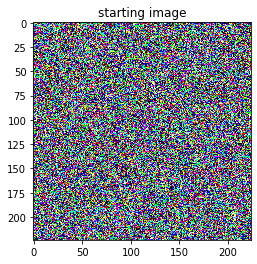

In [10]:
# function to massage img_tensor for using as input to plt.imshow()
def image_converter(im):
    
    # move the image to cpu
    im_copy = im.cpu()
    
    # for plt.imshow() the channel-dimension is the last
    # therefore use transpose to permute 
    im_copy = im_copy.clone().detach().numpy().transpose(1,2,0)
    # clip negative values as plt.imshow() only accepts 
    # floating values in range [0,1] and integers in range [0,255]
    im_copy = im_copy.clip(0, 1) 
    
    return im_copy

plt.imshow(image_converter(img_tensor))                                                               
plt.title('starting image')
plt.show()

In [11]:
from torch import optim

In [12]:
# move the model and input image to the GPU (if available) 
# This should be done before defining an optimizer
# This is mentioned in the following pytorch page: https://pytorch.org/docs/master/optim.html
# Also see the discussion here: https://discuss.pytorch.org/t/effect-of-calling-model-cuda-after-constructing-an-optimizer/15165/7
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Calculations being executed on {}'.format(device))

model.to(device)
img_tensor = img_tensor.to(device).requires_grad_(True) # move the image tensor to cuda 
                                                        # set its requires_grad_ flag to be true

# check that the model and img_tensor are on cuda or not
# https://discuss.pytorch.org/t/how-to-check-if-model-is-on-cuda/180
print('googlenet is on cuda: {}'.format(next(model.parameters()).is_cuda))
print('img_tensor is on cuda: {}'.format(img_tensor.is_cuda))

optimizer = optim.Adam([img_tensor], lr =0.04)

Calculations being executed on cuda
googlenet is on cuda: True
img_tensor is on cuda: True


epoch: 0/1000, activation: 0.006662995088845491


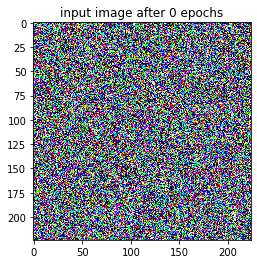

epoch: 100/1000, activation: 17.088376998901367


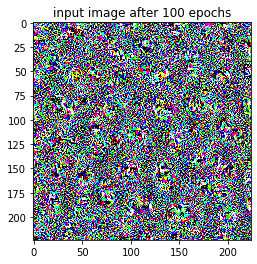

epoch: 200/1000, activation: 26.287214279174805


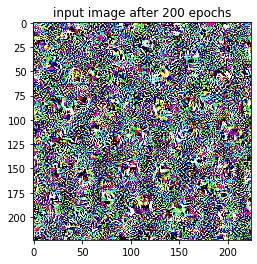

epoch: 300/1000, activation: 35.8581428527832


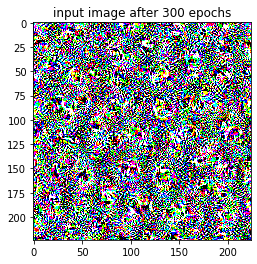

epoch: 400/1000, activation: 45.65304183959961


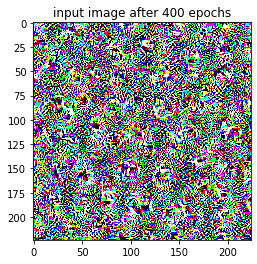

epoch: 500/1000, activation: 55.94599914550781


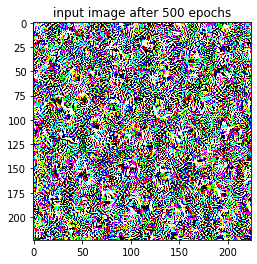

epoch: 600/1000, activation: 66.44861602783203


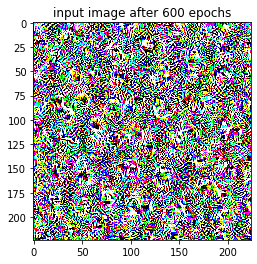

epoch: 700/1000, activation: 77.09195709228516


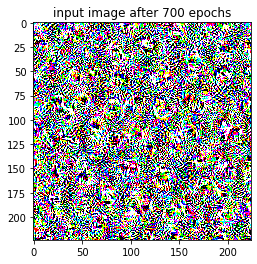

epoch: 800/1000, activation: 88.09495544433594


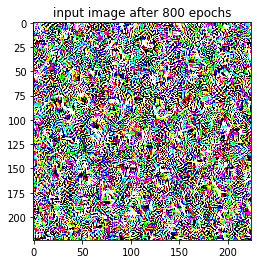

epoch: 900/1000, activation: 99.21089935302734


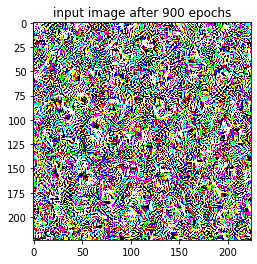

In [13]:
# Since we are not training googlenet here, therefore we should use evaluation mode 
# this is because batch-normalization layers in googlenet will have different behaviour in traning vs evaluation modes
model.eval()


num_epochs = 1000
display_every = 100
unit_idx = 11 # unit of the convolution layer that we wish to visualize

for epoch in range(num_epochs):
    
    optimizer.zero_grad()
    model(img_tensor.unsqueeze(0))
    layer_out = activation['4a']
    loss = -layer_out[0, unit_idx].mean() 
    loss.backward()
    optimizer.step()
    # normalize the updated img_tensor to have pytorch specified mean and std. dev.
    # img_tensor = normalize(img_tensor.clone().detach()).requires_grad_(True)
    # the above step of renormalizing the updated img_tensor does not work: the activation remains frozen at ~ 2.368 and no patterns seem to develop in the image
    # Will have to understand this further  
    
    if epoch % display_every == 0:
        print('epoch: {}/{}, activation: {}'.format(epoch, num_epochs, -loss))
        plt.imshow(image_converter(img_tensor))
        plt.title('input image after {} epochs'.format(epoch))
        plt.show()


The final image does seeem to have some very high frequency patterns. However, the high frequency behaviour obscures any interpretation of what the neuron seems to learning. 

I found that my code above is quite similar to the implementation of feature visualization with activation maximization in [this](https://towardsdatascience.com/how-to-visualize-convolutional-features-in-40-lines-of-code-70b7d87b0030) blog post. There the author also discusses the emerges of high frequence patterns in the image and how he got around it by initially feeding smaller sized images and slowing upscaling them. Let us try this.

In [19]:
upscaling_steps = 15 # no. of times to upscale
upscaling_factor = 1.2
optim_steps = 1000 # no. of times to optimize an input image before upscaling

In [20]:
import cv2 # for resizing images

# e.g. of how to resize images using cv2
# just like in plt.imshow() cv2 also expects the channel info. to be in the last axis
# the documentation for cv2.resize() recommends using inter_cubic for interpolation when upscaling
cv2.resize(image_converter(img_tensor), dsize = (0,0) , fx = 1.2, fy = 1.2, 
           interpolation = cv2.INTER_CUBIC).shape 

(3224, 3224, 3)

In [21]:
# initial random image
H = 28 # height of image
W = 28 # width of image
im = np.single(np.random.uniform(0, 1, (3, H, W))) # we need the pixel values to be of type float32 
img_tensor = normalize(torch.from_numpy(im)).to(device).requires_grad_(True)
print('image shape: {}, device: {}, dtype: {}'.format(img_tensor.shape, 
                                                      img_tensor.device, img_tensor.dtype ))

image shape: torch.Size([3, 28, 28]), device: cuda:0, dtype: torch.float32


begin mag_epoch 0, activation: 0.0
end mag_epoch: 0, activation: 0.0


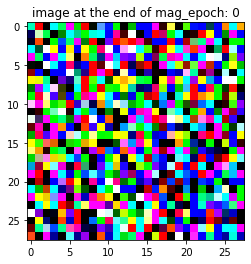

begin mag_epoch 1, activation: 0.20265662670135498
end mag_epoch: 1, activation: 1216.06787109375


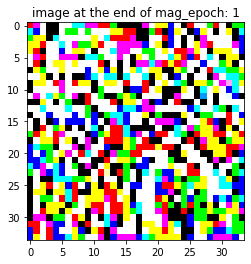

begin mag_epoch 2, activation: 0.8107100129127502
end mag_epoch: 2, activation: 1219.22607421875


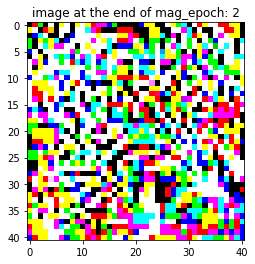

begin mag_epoch 3, activation: 0.7801828384399414
end mag_epoch: 3, activation: 1091.055908203125


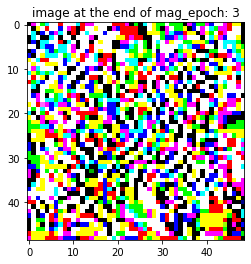

begin mag_epoch 4, activation: 0.2962704598903656
end mag_epoch: 4, activation: 1336.6490478515625


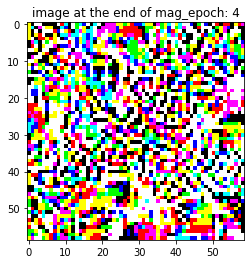

begin mag_epoch 5, activation: 0.07725797593593597
end mag_epoch: 5, activation: 1276.2471923828125


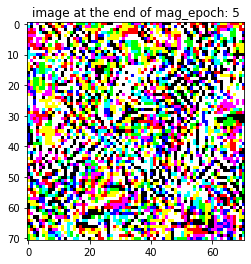

begin mag_epoch 6, activation: 0.19128172099590302
end mag_epoch: 6, activation: 1197.80419921875


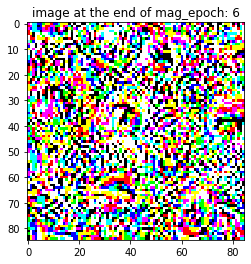

begin mag_epoch 7, activation: 0.058628786355257034
end mag_epoch: 7, activation: 1354.9573974609375


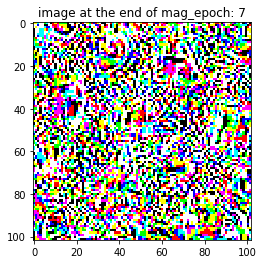

begin mag_epoch 8, activation: 0.149694561958313
end mag_epoch: 8, activation: 1209.8468017578125


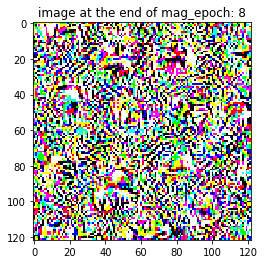

begin mag_epoch 9, activation: 0.19469821453094482
end mag_epoch: 9, activation: 1177.6448974609375


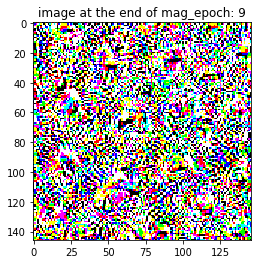

begin mag_epoch 10, activation: 0.12165176868438721
end mag_epoch: 10, activation: 1164.521484375


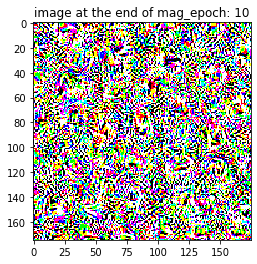

begin mag_epoch 11, activation: 0.07785829901695251
end mag_epoch: 11, activation: 1176.9041748046875


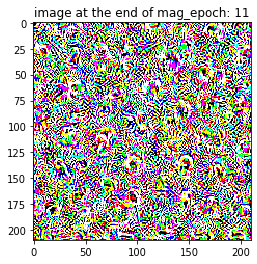

begin mag_epoch 12, activation: 0.08262383192777634
end mag_epoch: 12, activation: 1208.8751220703125


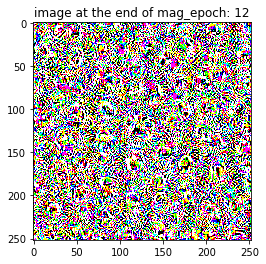

begin mag_epoch 13, activation: 0.12919698655605316
end mag_epoch: 13, activation: 1245.4952392578125


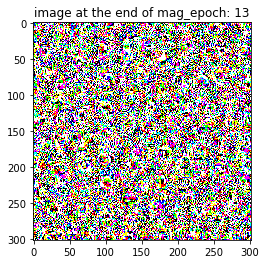

begin mag_epoch 14, activation: 0.0818052813410759
end mag_epoch: 14, activation: 1247.8018798828125


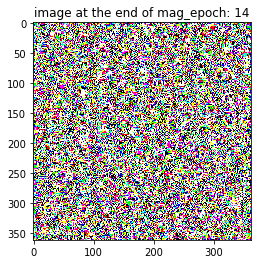

In [22]:
unit_idx = 11 # the neuron to visualize

model.eval()
for mag_epoch in range(upscaling_steps):
    optimizer = optim.Adam([img_tensor], lr = 0.4)
    
    for opt_epoch in range(optim_steps):
        optimizer.zero_grad()
        model(img_tensor.unsqueeze(0))
        layer_out = activation['4a']
        loss = -layer_out[0, unit_idx].mean()
        # print activation at the beginning of each mag_epoch
        if opt_epoch == 0:
            print('begin mag_epoch {}, activation: {}'.format(mag_epoch, -loss))
        loss.backward()
        optimizer.step()
        
    # view the result of optimising the image
    print('end mag_epoch: {}, activation: {}'.format(mag_epoch, -loss))
    img = image_converter(img_tensor)    
    plt.imshow(img)
    plt.title('image at the end of mag_epoch: {}'.format(mag_epoch))
    plt.show()
    
    img = cv2.resize(img, dsize = (0,0), 
                     fx = upscaling_factor, fy = upscaling_factor).transpose(2,0,1) # move the batch axis to be the first
    img_tensor = torch.from_numpy(img).to(device).requires_grad_(True)

In [23]:
img_tensor.shape

torch.Size([3, 434, 434])